<h2><a href="https://leetcode.com/problems/count-number-of-teams">1395. Count Number of Teams</a></h2><h3>Medium</h3><hr><p>There are <code>n</code> soldiers standing in a line. Each soldier is assigned a <strong>unique</strong> <code>rating</code> value.</p>

<p>You have to form a team of 3 soldiers amongst them under the following rules:</p>

<ul>
	<li>Choose 3 soldiers with index (<code>i</code>, <code>j</code>, <code>k</code>) with rating (<code>rating[i]</code>, <code>rating[j]</code>, <code>rating[k]</code>).</li>
	<li>A team is valid if: (<code>rating[i] &lt; rating[j] &lt; rating[k]</code>) or (<code>rating[i] &gt; rating[j] &gt; rating[k]</code>) where (<code>0 &lt;= i &lt; j &lt; k &lt; n</code>).</li>
</ul>

<p>Return the number of teams you can form given the conditions. (soldiers can be part of multiple teams).</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> rating = [2,5,3,4,1]
<strong>Output:</strong> 3
<strong>Explanation:</strong> We can form three teams given the conditions. (2,3,4), (5,4,1), (5,3,1). 
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> rating = [2,1,3]
<strong>Output:</strong> 0
<strong>Explanation:</strong> We can&#39;t form any team given the conditions.
</pre>

<p><strong class="example">Example 3:</strong></p>

<pre>
<strong>Input:</strong> rating = [1,2,3,4]
<strong>Output:</strong> 4
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>n == rating.length</code></li>
	<li><code>3 &lt;= n &lt;= 1000</code></li>
	<li><code>1 &lt;= rating[i] &lt;= 10<sup>5</sup></code></li>
	<li>All the integers in <code>rating</code> are <strong>unique</strong>.</li>
</ul>


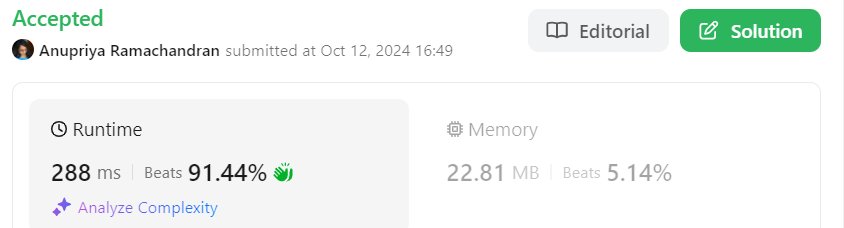

In [1]:
class Solution:
    # Update the segment tree at a specific index
    def update(self, index, value, low, high, position, segTree):
        if low == high:  # Base case: Single element
            segTree[index] += value  # Update the value at the leaf node
        else:
            mid = (low + high) // 2  # Find the middle point
            # If position is in the left subtree
            if position <= mid and position >= low:
                self.update(2 * index + 1, value, low, mid, position, segTree)
            else:
                self.update(2 * index + 2, value, mid + 1, high, position, segTree)
            # Update the current node
            segTree[index] = segTree[2 * index + 1] + segTree[2 * index + 2]

    # Get the sum range in the segment tree
    def sumRange(self, left, right, low, high, index, segTree):
        if low >= left and high <= right:  # Total overlap
            return segTree[index]
        if right < low or high < left:  # No overlap
            return 0
        mid = (low + high) // 2  # Partial overlap
        # Sum the ranges from both children
        return self.sumRange(left, right, low, mid, 2 * index + 1, segTree) + \
               self.sumRange(left, right, mid + 1, high, 2 * index + 2, segTree)

    # Main method to count the number of valid teams
    def numTeams(self, ratings):
        teamCount = 0  # Initialize team count
        maxRating = max(ratings) + 1  # Find max rating
        leftSegmentTree = [0] * (4 * maxRating)  # Segment tree for ratings to the left
        rightSegmentTree = [0] * (4 * maxRating)  # Segment tree for ratings to the right

        # Update right segment tree with all ratings except the first
        for i in range(1, len(ratings)):
            self.update(0, 1, 0, maxRating - 1, ratings[i], rightSegmentTree)

        # Update left segment tree with the first rating
        self.update(0, 1, 0, maxRating - 1, ratings[0], leftSegmentTree)


        # Iterate through ratings from the second element
        for i in range(1, len(ratings)):
            # Count teams with a lower rating on the left and a higher rating on the right
            leftLessCount = self.sumRange(0, ratings[i] - 1, 0, maxRating - 1, 0, leftSegmentTree)
            rightGreaterCount = self.sumRange(ratings[i] + 1, maxRating - 1, 0, maxRating - 1, 0, rightSegmentTree)
            teamCount += leftLessCount * rightGreaterCount

            # Count teams with a higher rating on the left and a lower rating on the right
            leftGreaterCount = self.sumRange(ratings[i] + 1, maxRating - 1, 0, maxRating - 1, 0, leftSegmentTree)
            rightLessCount = self.sumRange(0, ratings[i] - 1, 0, maxRating - 1, 0, rightSegmentTree)
            teamCount += leftGreaterCount * rightLessCount

            # Update the segment trees with the current rating
            self.update(0, 1, 0, maxRating - 1, ratings[i], leftSegmentTree)
            self.update(0, -1, 0, maxRating - 1, ratings[i], rightSegmentTree)

        return teamCount  # Return the total number of valid teams

The code is implementing a solution to the problem of counting the number of valid teams that can be formed given a set of soldiers with unique rating values.

The main idea behind the solution is to use segment trees to efficiently calculate the number of soldiers with a lower rating on the left and a higher rating on the right, as well as the number of soldiers with a higher rating on the left and a lower rating on the right.

The code first initializes two segment trees, one for the ratings to the left and one for the ratings to the right. These trees are used to keep track of the count of soldiers with a specific rating.

Next, the code iterates through the ratings starting from the second element. For each rating, it calculates the number of teams with a lower rating on the left and a higher rating on the right, as well as the number of teams with a higher rating on the left and a lower rating on the right, and adds these counts to the overall team count.

To calculate the number of teams with a lower rating on the left and a higher rating on the right, the code uses the sumRange() function to sum the counts of soldiers with ratings less than the current rating in the left segment tree, and the counts of soldiers with ratings greater than the current rating in the right segment tree.

To calculate the number of teams with a higher rating on the left and a lower rating on the right, the code uses the sumRange() function to sum the counts of soldiers with ratings greater than the current rating in the left segment tree, and the counts of soldiers with ratings less than the current rating in the right segment tree.

After calculating the counts, the code updates the segment trees with the current rating by calling the update() function.

Finally, the code returns the total team count.

Overall, the code efficiently uses segment trees to count the number of valid teams by keeping track of the counts of soldiers with specific ratings. It iteratively calculates the counts for each rating and updates the segment trees accordingly.

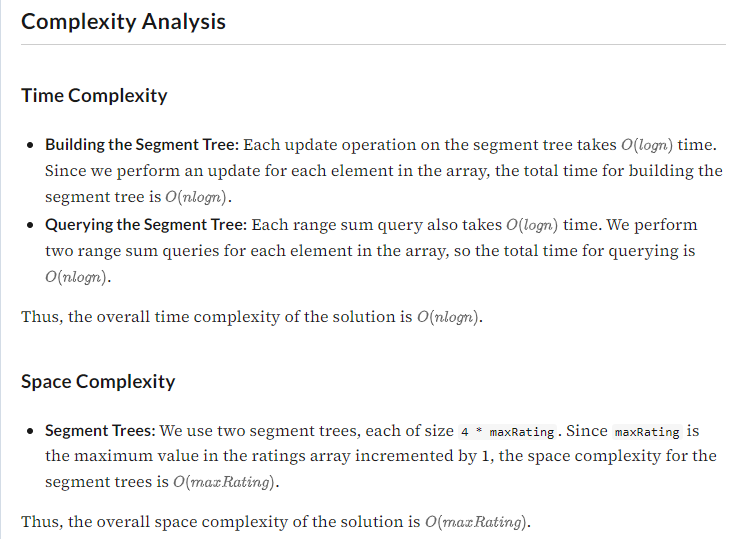